In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import math
from datetime import time
from datetime import date
from datetime import datetime

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [29]:
 import statsmodels.api as sm

In [5]:
os.chdir('C:/Users/yogitajagdeep/Desktop/projectML/edproject3')

In [6]:
train_data=pd.read_csv("train_cab.csv")
test_data=pd.read_csv("test.csv")

In [7]:
print(train_data.shape)
print(test_data.shape)

(16067, 7)
(9914, 6)


In [8]:
#train_data.head()

In [67]:
#Missing Value Analysis
missing_val=pd.DataFrame(train_data.isnull().sum())

In [68]:
print(missing_val)

                   0
pickup_datetime    0
pickup_longitude   0
pickup_latitude    0
dropoff_longitude  0
dropoff_latitude   0
passenger_count    0


In [8]:
#Dropping Rows with missing values
train_data=train_data.dropna()

In [13]:
##CLEANING DATA

In [15]:
train_data.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [16]:
##Deleting the Invalid entries in the data

In [9]:
train_data=train_data[train_data.fare_amount != '430-']
##Deleting the entry with invalid fare_amount`

In [10]:
train_data=train_data[train_data.pickup_datetime != '43']
##Deleting the entry with invalid pickup datetime

In [19]:
##Correcting the datatypes of attributes

In [11]:
train_data['fare_amount'] = train_data['fare_amount'].astype('float64')

In [12]:
train_data['pickup_datetime']=pd.to_datetime(train_data['pickup_datetime'],infer_datetime_format=True)

In [13]:
train_data['passenger_count'] = train_data['passenger_count'].astype('int64')

In [58]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,weekday
count,12990.000000,12990.000000,12990.000000,12990.000000,12990.000000,12990.000000,12990.000000,12990.000000,12990.000000
mean,8.333116,-73.981727,40.753047,-73.980862,40.753515,1.641570,2.247897,13.674288,3.011624
std,3.448086,0.016031,0.021069,0.016553,0.021857,1.268459,1.480287,6.341204,1.958914
min,0.010000,-74.018108,40.692830,-74.019535,40.692483,0.000000,0.000000,0.000000,0.000000
25%,5.700000,-73.992737,40.738708,-73.991951,40.739199,1.000000,1.165052,9.000000,1.000000
50%,7.700000,-73.982634,40.753613,-73.982011,40.754688,1.000000,1.875978,14.000000,3.000000
75%,10.500000,-73.971321,40.766820,-73.970670,40.767393,2.000000,2.972227,19.000000,5.000000
max,18.500000,-73.929557,40.811077,-73.929520,40.812595,6.000000,9.923632,23.000000,6.000000


In [59]:
##We can clearly see from the results that min fare amount is negative which is not posible 
##Maximum Passesnger count is 5345 which also is not possible.

In [14]:
#Deleting invalid values of fare
train_data=train_data[train_data.fare_amount > 0]


In [15]:
train_data=train_data[train_data.passenger_count <=6]
##As the cab can be maximum 6 seater 
#Deleting the entry with invalid Number of passengers

In [62]:
#test_data.describe()

In [63]:
#We can clearly see that the standard deviation of longitudes and latitudes in train data is way more than test data
#Hence, train data have outliers which are required to be removed
#while the stats of passenger_count looks same in train and test therefore not doing the outlier analysis for that.

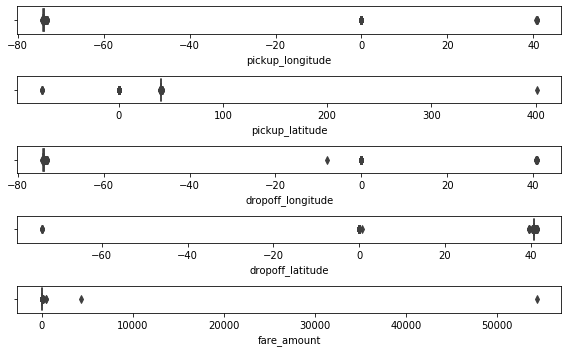

In [29]:
#Outlier Analysis
 #Plot boxplot to visualize Outliers

fig, axs = plt.subplots(5, figsize = (8,5))
plt1 = sns.boxplot(train_data['pickup_longitude'], ax = axs[0])
plt2 = sns.boxplot(train_data['pickup_latitude'], ax = axs[1])
plt3 = sns.boxplot(train_data['dropoff_longitude'], ax = axs[2])
plt4 = sns.boxplot(train_data['dropoff_latitude'], ax = axs[3])
plt5 = sns.boxplot(train_data['fare_amount'], ax = axs[4])
plt.tight_layout()

In [16]:
#Removing Outliers
col=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount"]

In [17]:
for i in col:
    q75,q25=np.percentile(train_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-1.5*iqr
    maximum=q75+1.5*iqr
    train_data=train_data.drop(train_data[train_data.loc[:,i]<minimum].index)
    train_data=train_data.drop(train_data[train_data.loc[:,i]>maximum].index)

In [66]:
#train_data.describe()

In [67]:
#Now, the train data stats look very similar that of test data.
#So,we are done with preprocessing.

In [68]:
#EXPLORATORY DATA ANALYSIS

In [31]:
#Extracting distance travelled from the coordinates.

In [18]:
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [19]:
train_data['distance_km']=distance(train_data.pickup_latitude,train_data.pickup_longitude,train_data.dropoff_latitude,train_data.dropoff_longitude)

In [71]:
#train_data.head()

In [20]:
#Extracting date and time from datetime
train_data['time']= train_data['pickup_datetime'].apply(lambda x: datetime.time(x))
train_data['date']= train_data['pickup_datetime'].apply(lambda x: datetime.date(x))

In [21]:
#Extracting hour of the day from time
train_data['hour']=train_data['time'].apply(lambda x: x.hour)

In [22]:
#Extracting weekday from date
train_data['weekday']= train_data['date'].apply(lambda x: date.weekday(x))

In [75]:
#train_data.head()

In [23]:
#We can drop pickup_datetime,date and time attributes as we have extracted the requied features.
train = train_data.drop(['pickup_datetime','date','time'], axis=1)

In [40]:
#train.head()

In [41]:
# train.fare_amount.hist(bins=50, figsize=(8,4))
# plt.xlabel('Fare amount')
# plt.title('Histogram Fare amount')

In [42]:
# train.distance_km.hist(bins=50, figsize=(8,4))
# plt.xlabel('distance in km')
# plt.title('Histogram ride distances in km')

In [43]:
# train.passenger_count.hist(bins=50, figsize=(8,4))
# plt.xlabel('passenger_count')
# plt.title('Histogram Passenger_count')

Text(0.5, 1.0, 'Histogram Weekday')

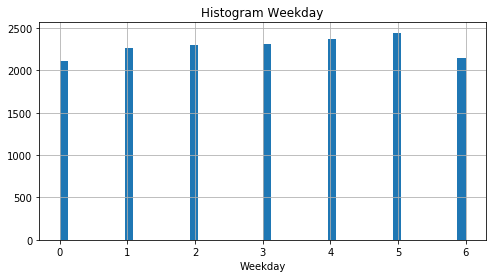

In [44]:
train.weekday.hist(bins=50, figsize=(8,4))
plt.xlabel('Weekday')
plt.title('Histogram Weekday')

Text(0.5, 1.0, 'Histogram hour')

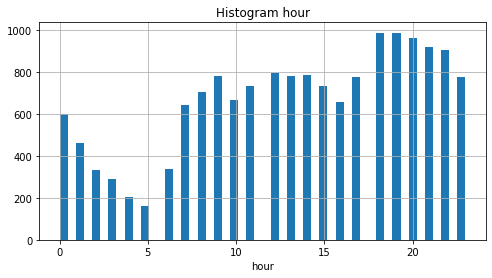

In [45]:
train.hour.hist(bins=50, figsize=(8,4))
plt.xlabel('hour')
plt.title('Histogram hour')

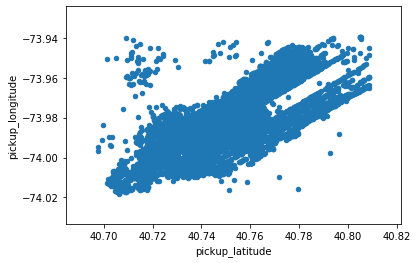

In [77]:
train.plot.scatter(x='pickup_latitude',y='pickup_longitude')

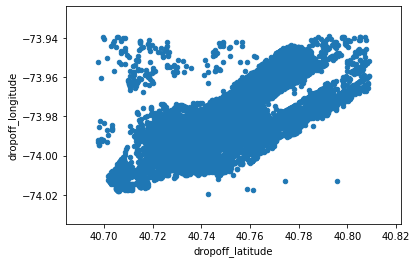

In [78]:
train.plot.scatter(x='dropoff_latitude',y='dropoff_longitude')

In [400]:
# train.groupby('passenger_count')['distance_km', 'fare_amount'].mean()
# train.groupby('weekday')['distance_km', 'fare_amount'].mean()
# train.groupby('hour')['distance_km', 'fare_amount'].mean()

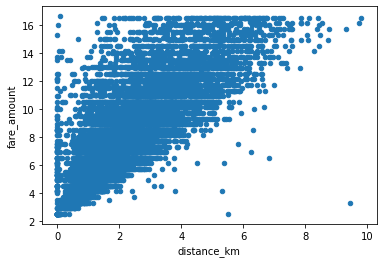

In [79]:
train.plot.scatter(x='distance_km',y='fare_amount')

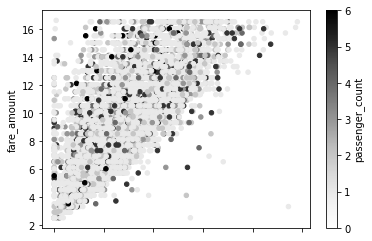

In [81]:
train.plot.scatter(x='distance_km',y='fare_amount',c='passenger_count')

In [82]:
#We can derive from this plot that passenger_count does not have a big impact on fare_amount

In [84]:
#train.dtypes

In [85]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,weekday
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389961,0,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.800149,4,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999784,7,1
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,3.788428,9,3
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,1.556295,20,1


In [24]:
train['weekend'] = pd.Categorical(train.weekday)
train['hour'] = pd.Categorical(train.hour)

In [87]:
#Data Scaling
#distance_km variable is skewed hence using normalisation to scale data

In [25]:
#Normalising numeric attributes
cnames=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","distance_km"]
for i in cnames:
    train[i]=(train[i]-min(train[i]))/(max(train[i])-min(train[i]))

In [49]:
#Divide data into train and test
X = train.values[:,1:]
Y = train.values[:,0]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [50]:
#LinearRegression

In [51]:
lr = LinearRegression()
model1=lr.fit(X_train, y_train)

In [52]:
#Predicting the count using LR model
predictions_LR = model1.predict(X_test) 

In [53]:
#Calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [54]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [55]:
print(rmse(predictions_LR,y_test))
print(MAPE(y_test,predictions_LR))

2.1001261816830237
19.919308961188957


In [95]:
#RMSE: 2.1001261816830237
#MAPE: 19.919308961188957

In [56]:
#As the data consists of mostly small trips the rmse in predicting fare_amount is coming very less 
#which doesnot gives as the fair idea of our error. Hence, we'll use MAPE going further 

In [57]:
##Random Forest Regressor

In [58]:
##Finding best parameters
param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),}

In [59]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5)

In [60]:
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

In [76]:
print(best_params)

{'max_depth': 6, 'n_estimators': 1000}


In [77]:
rfr = RandomForestRegressor(max_depth=6, n_estimators= 1000, random_state=False, verbose=False)

In [78]:
model2=rfr.fit(X_train, y_train)

In [79]:
#Predicting the count using RF model
predictions_RF = model2.predict(X_test) 

In [80]:
print(MAPE(y_test,predictions_RF))

18.766974136672264


In [ ]:
#Support Vector Regressor [EPS]

In [81]:
#Modelling eps-regression with different kernels
# svrepsrbf = SVR(kernel = 'rbf')
svrepslin = SVR(kernel = 'linear')
# svrepspol = SVR(kernel = 'poly')
# svrepssig = SVR(kernel = 'sigmoid')

In [83]:
# model8=svrepsrbf.fit(X_train, y_train)
model3=svrepslin.fit(X_train, y_train)
# model10=svrepspol.fit(X_train, y_train)
# model11=svrepssig.fit(X_train, y_train)

In [84]:
#PRedicting count variable
# predictions_epsrb = model8.predict(X_test) 
predictions_epsli = model3.predict(X_test) 
# predictions_epspo= model10.predict(X_test) 
# predictions_epssi = model11.predict(X_test) 

In [85]:
#Calculating MAPE
print(MAPE(y_test, predictions_epsli))

17.708814364531893


In [86]:
##Finding best parameters
param_grid2={'C':[0.001, 0.01, 0.1, 1, 10],'gamma' : [0.001, 0.01, 0.1, 1],}

In [87]:
grid_sc = GridSearchCV(SVR(kernel='linear'), param_grid=param_grid2, cv=10)

In [109]:
grid_rs = grid_sc.fit(X_train, y_train)
bestparams = grid_rs.best_params_

In [110]:
print(bestparams)

{'C': 1, 'gamma': 0.001}


In [88]:
svrepslintuned = SVR(kernel = 'linear',C=1,gamma=0.001)

In [89]:
modeltuned=svrepslintuned.fit(X_train, y_train)

In [90]:
predictfinal=modeltuned.predict(X_test)

In [91]:
print(MAPE(y_test, predictfinal))

17.708814364531893


In [116]:
#No difference in the error rate

In [ ]:
##Pedicting fare_amount for test data
##preprocessing test data

In [70]:
test_data['passenger_count'] = test_data['passenger_count'].astype('int64')
test_data['distance_km']=distance(test_data.pickup_latitude,test_data.pickup_longitude,test_data.dropoff_latitude,test_data.dropoff_longitude)

In [72]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],infer_datetime_format=True)
test_data['time']= test_data['pickup_datetime'].apply(lambda x: datetime.time(x))
test_data['date']= test_data['pickup_datetime'].apply(lambda x: datetime.date(x))
test_data['hour']=test_data['time'].apply(lambda x: x.hour)
test_data['weekday']= test_data['date'].apply(lambda x: date.weekday(x))

In [73]:
test = test_data.drop(['pickup_datetime','date','time'], axis=1)
test['weekend'] = pd.Categorical(test.weekday)
test['hour'] = pd.Categorical(test.hour)
for i in cnames:
    test[i]=(test[i]-min(test[i]))/(max(test[i])-min(test[i]))

In [92]:
##Predicting Result
Result=modeltuned.predict(test)

In [96]:
pd.DataFrame(Result).to_csv(r'C:\Users\yogitajagdeep\Desktop\projectML\edproject3\result.csv')